Setup Environment and Ingest Raw Data

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display

In [152]:
raw_movies = pd.read_csv("data/imdb_top_1000.csv")

In [153]:
display(raw_movies.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [154]:
# Assess non-null counts, column data types, and columns in general
raw_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [155]:
cleaned_movies = raw_movies.copy(deep=True)

In [156]:
# Adjust column data types

# Fill missing release date for Apollo 13 movie then convert column to int data type
apollo_13_row = cleaned_movies[cleaned_movies.Released_Year == 'PG'].index.values
cleaned_movies.loc[apollo_13_row, 'Released_Year'] = 1995

# Split string to get just minute values for Runtime column to convert to int dtype
cleaned_movies['Runtime'] = cleaned_movies.Runtime.apply(lambda x: x.split()[0])

# Convert columns to appropriate dtypes, after value transformations
cleaned_movies['Released_Year'] = cleaned_movies.Released_Year.astype(int)
cleaned_movies['Runtime'] = cleaned_movies.Runtime.astype(int)

In [157]:
cleaned_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int64  
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 125.1+ KB


In [158]:
# Analyze numerical columns within raw_movies
cleaned_movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Released_Year,1000.0,1991.22100,23.285669,1920.0,1976.00,1999.0,2009.00,2020.0
Runtime,1000.0,122.89100,28.093671,45.0,103.00,119.0,137.00,321.0
IMDB_Rating,1000.0,7.94930,0.275491,7.6,7.70,7.9,8.10,9.3
Meta_score,843.0,77.97153,12.376099,28.0,70.00,79.0,87.00,100.0
No_of_Votes,1000.0,273692.91100,327372.703934,25088.0,55526.25,138548.5,374161.25,2343110.0


In [159]:
# Drop irrelevant columns for ML purposes
cleaned_movies = cleaned_movies[
    ['Series_Title', 'Released_Year', 'Certificate', 'Genre', 'IMDB_Rating', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
]

In [160]:
display(cleaned_movies)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4
0,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,1974,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen
996,Giant,1956,G,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker
997,From Here to Eternity,1953,Passed,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed
998,Lifeboat,1944,NaN,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix


In [161]:
# Understand different ratings for movies
display(cleaned_movies.Certificate.value_counts())

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [162]:
# Analyze movies that do not have a rating and determine best approach to handling these
display(cleaned_movies[cleaned_movies.Certificate.isnull()].head())

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4
30,Seppuku,1962,NaN,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba
54,Ayla: The Daughter of War,2017,NaN,"Biography, Drama, History",8.4,"In 1950, amid-st the ravages of the Korean War...",Can Ulkay,Erdem Can,Çetin Tekindor,Ismail Hacioglu,Kyung-jin Lee
77,Tengoku to jigoku,1963,NaN,"Crime, Drama, Mystery",8.4,An executive of a shoe company becomes a victi...,Akira Kurosawa,Toshirô Mifune,Yutaka Sada,Tatsuya Nakadai,Kyôko Kagawa
92,Babam ve Oglum,2005,NaN,"Drama, Family",8.3,The family of a left-wing journalist is torn a...,Çagan Irmak,Çetin Tekindor,Fikret Kuskan,Hümeyra,Ege Tanman
121,Ikiru,1952,NaN,Drama,8.3,A bureaucrat tries to find a meaning in his li...,Akira Kurosawa,Takashi Shimura,Nobuo Kaneko,Shin'ichi Himori,Haruo Tanaka


In [163]:
# Drop movies with no ratings since it is a small subset, and most of the movies are foreign 
cleaned_movies['Certificate'] = cleaned_movies.Certificate.fillna('Not Rated')

/opt/homebrew/Caskroom/miniforge/base/envs/FBCap/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


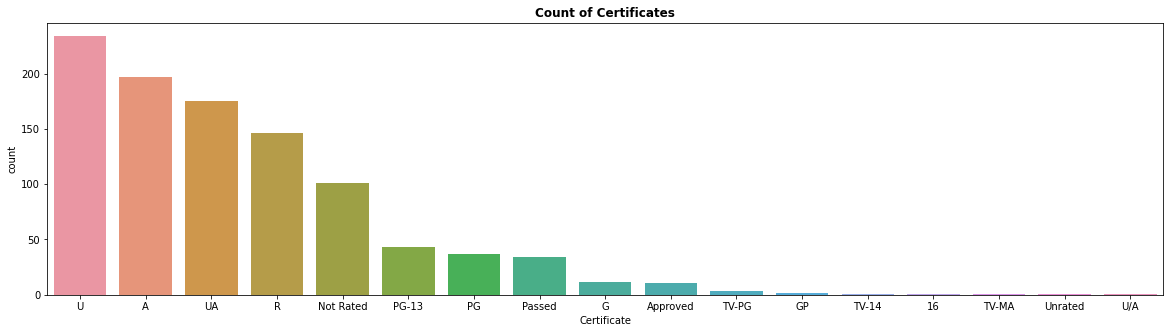

In [164]:
fig = plt.figure(figsize=(20,5))
g = sns.countplot(cleaned_movies.Certificate, order=cleaned_movies.Certificate.value_counts().index)
g.set_title("Count of Certificates", weight = "bold")
plt.show()

In [165]:
movie_cert_mapping = {
    "U": "Family",
    "A": "Adult",
    "UA": "Adult",
    "R": "Adult",
    "Not Rated": "Adult",
    "PG-13": "Adult",
    "PG": "Family",
    "Passed": "Adult",
    "G Certificate": "Family",
    "Approved": "Adult",
    "TV-PG": "Family",
    "GP": "Adult",
    "TV-14": "Adult",
    "16": "Adult",
    "TV-MA": "Adult",
    "Unrated": "Adult",
    "U/A": "Adult"
}

In [166]:
# Map values to certificates to 
cleaned_movies['Certificate'] = cleaned_movies.Certificate.map(movie_cert_mapping)
cleaned_movies['Certificate'] = cleaned_movies.Certificate.astype("category")

In [167]:
# Check Certification col calues and dtype
print(cleaned_movies.Certificate.value_counts())
print(type(cleaned_movies.Certificate.values))

Adult     714
Family    274
Name: Certificate, dtype: int64
<class 'pandas.core.arrays.categorical.Categorical'>


/opt/homebrew/Caskroom/miniforge/base/envs/FBCap/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


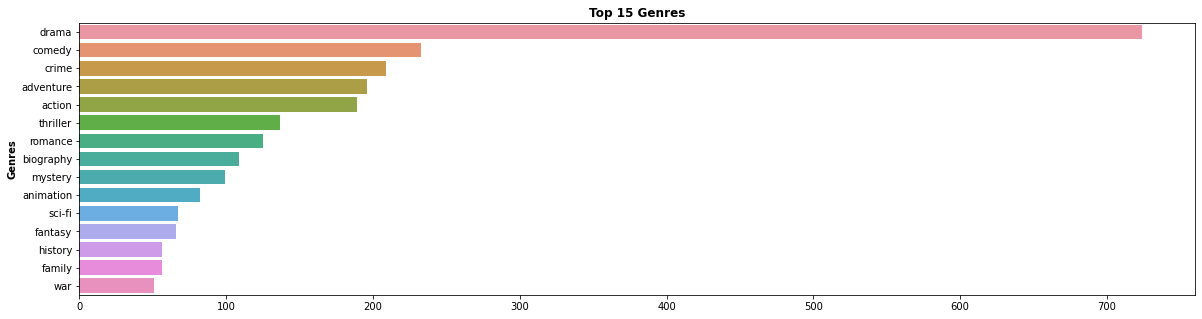

In [168]:
# Evaluate count of the top 15 Genres
from collections import Counter

genre = []
for x in cleaned_movies['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

count = Counter(genre)
count = count.most_common()[:15]
x,y = map(list,zip(*count))

fig = plt.figure(figsize=(20,5))
g = sns.barplot(y,x)
g.set_ylabel("Genres", weight = "bold")
g.set_title("Top 15 Genres", weight = "bold")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/FBCap/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


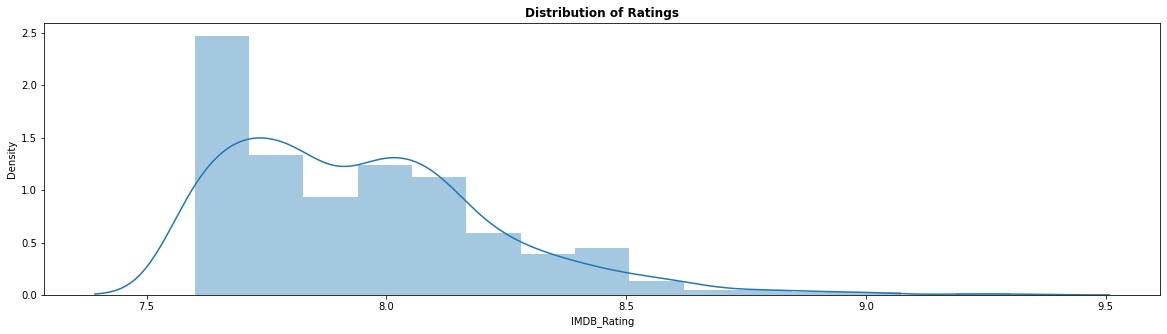

In [169]:
# Evaluate distribution of IMDB ratings
fig = plt.figure(figsize=(20,5))
g = sns.distplot(cleaned_movies['IMDB_Rating'],bins=15)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/FBCap/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


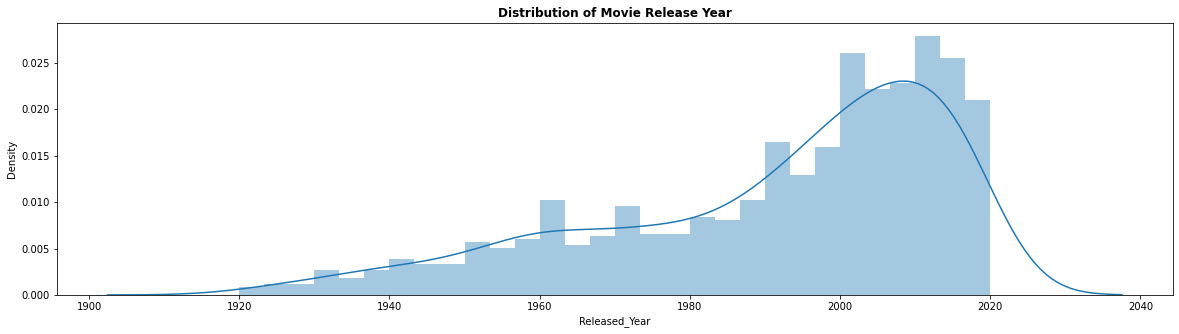

In [173]:
# Evaluate release year distribution
fig = plt.figure(figsize=(20,5))
g = sns.distplot(cleaned_movies['Released_Year'], bins=30)
g.set_title("Distribution of Movie Release Year", weight='bold')
plt.show()

In [176]:
# Save cleaned_movies to data folder for further usage
cleaned_movies.to_csv(path_or_buf='data/cleaned_movies.csv', index=False)

In [177]:
# Save movie images to separate file for later usage
raw_movies.Poster_Link.to_csv(path_or_buf='data/movie_poster_links.csv', index=False)